<a href="https://colab.research.google.com/github/sushil0607naik/Plant-Disease-Prediction/blob/main/PlantPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_dir='/content/drive/MyDrive/kle bca college/PlantDisease(Prediction)'#Replace with your path
categories=os.listdir(data_dir)

#Load images and labels
images=[]
labels=[]

for category in categories:
  print(category)
  folder_path=os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
    img_path=os.path.join(folder_path,img_file)
    img=cv2.imread(img_path)
    if img is not None:
      img=cv2.resize(img,(64,64)) #Resize to uniform size
      images.append(img)
      labels.append(category)

Tomato_healthy
Potato___Early_blight
Tomato__Target_Spot
Potato___Late_blight
Tomato__Tomato_mosaic_virus
Tomato_Early_blight


In [ ]:
# Convert to numpy arrays
x=np.array(images)
y=np.array(labels)
print("Labels:",np.unique(y))
print("Data shape:",x.shape)


Labels: ['Potato___Early_blight' 'Potato___Late_blight' 'Tomato_Early_blight'
 'Tomato__Target_Spot' 'Tomato__Tomato_mosaic_virus' 'Tomato_healthy']
Data shape: (5624, 64, 64, 3)


class Distribution:
Tomato__Target_Spot            1442
Potato___Early_blight          1043
Tomato_Early_blight            1022
Potato___Late_blight           1006
Tomato_healthy                  727
Tomato__Tomato_mosaic_virus     384
Name: count, dtype: int64


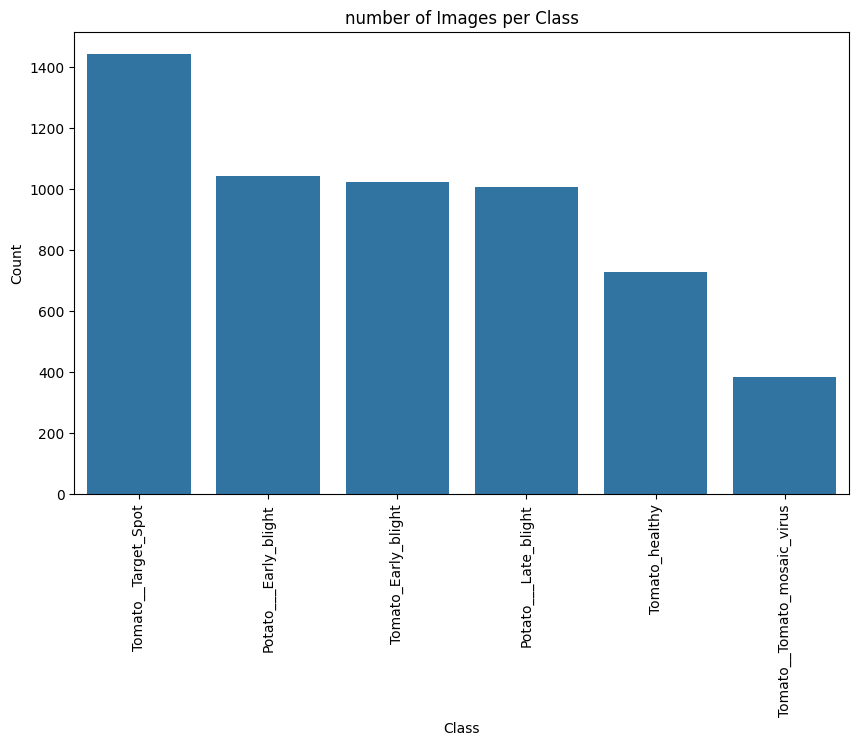

In [ ]:

class_counts=pd.Series(labels).value_counts()
print("class Distribution:")
print(class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
#Remove corrupted images
valid_images=[]
valid_labels=[]

for img, label in zip(x,y):
  if img.shape==(64,64,3): #Ensure all images are valid
    valid_images.append(img)
    valid_labels.append(label)

#Convert to numpy arrays
x=np.array(valid_images)
y=np.array(valid_labels)
print("Cleaned Data Shape:",x.shape)

Cleaned Data Shape: (5624, 64, 64, 3)


In [ ]:
#Encode labels
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#Save class names for later use
class_name=le.classes_

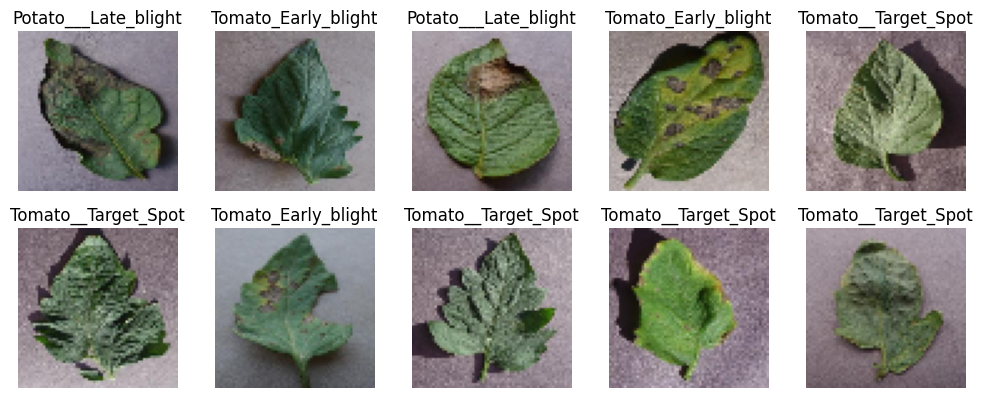

In [ ]:
#show sample images
import random

plt.figure(figsize=(10,10))
for i in range(10):
  idx=random.randint(0,len(x))
  plt.subplot(5,5,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB)) #covert BGR2RGB
  plt.title(class_name[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def extract_color_histogram(image,bins=(8,8,8)):
  #Convert to HSV color space
  image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist=cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
  hist=cv2.normalize(hist,hist).flatten()
  return hist
  #Extract features
x_features=[extract_color_histogram(img) for img in x]
x_features=np.array(x_features)

In [ ]:
#Choose model
model=SVC(kernel='rbf',C=10,gamma='scale')

In [ ]:
#Train/Test Split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)

#Train model
model.fit(x_train,y_train)
#Predict
y_pred=model.predict(x_test)

Accuracy: 0.9742222222222222
F1 Score: 0.9743391608743481


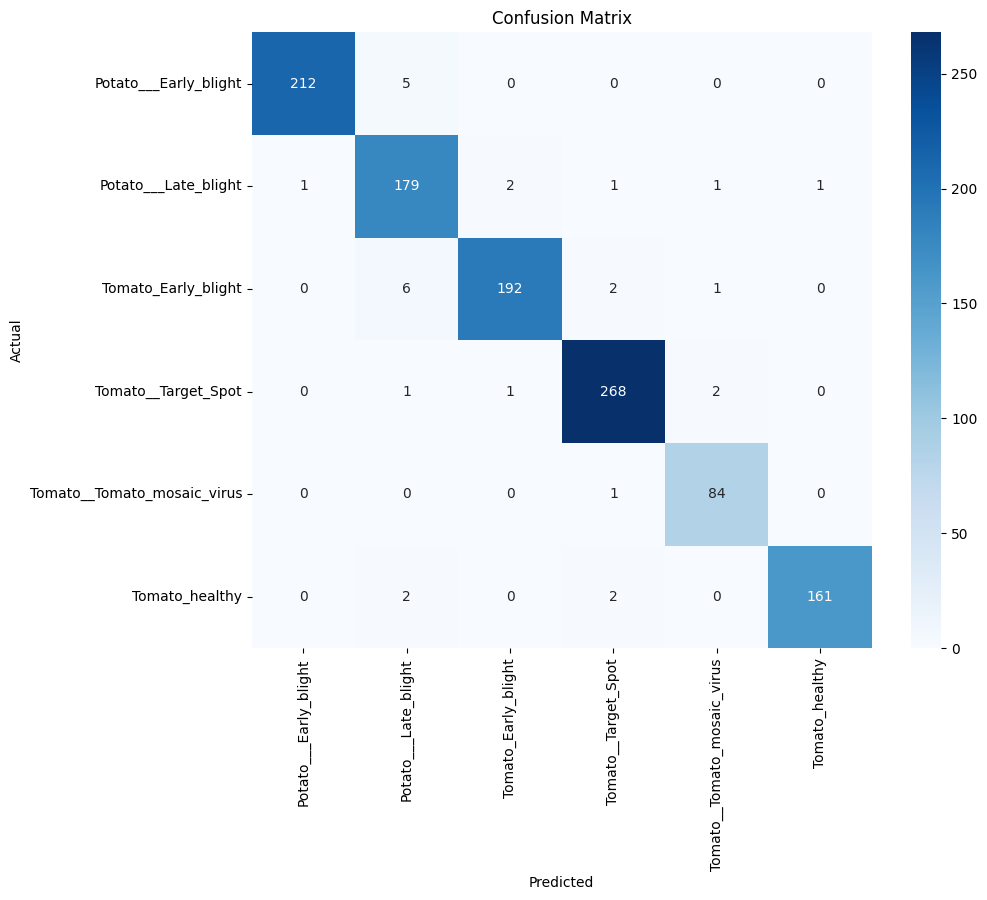

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

#Accuracy
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

f1=f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_name,yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_name))

Classification Report:
                             precision    recall  f1-score   support

      Potato___Early_blight       1.00      0.98      0.99       217
       Potato___Late_blight       0.93      0.97      0.95       185
        Tomato_Early_blight       0.98      0.96      0.97       201
        Tomato__Target_Spot       0.98      0.99      0.98       272
Tomato__Tomato_mosaic_virus       0.95      0.99      0.97        85
             Tomato_healthy       0.99      0.98      0.98       165

                   accuracy                           0.97      1125
                  macro avg       0.97      0.97      0.97      1125
               weighted avg       0.97      0.97      0.97      1125

